In [33]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('iris.csv') # Load the dataset
# Crie uma variável com os valores categóricos únicos da coluna 'species' antes da conversão para int
categorias_species = pd.read_csv('iris.csv')['species'].unique()
print("Valores categóricos originais de species:", categorias_species)

df['species'] = df['species'].astype('category').cat.codes # Convert species to categorical codes
df.head() 
# Print the value counts of the 'species' column
for r in df['species'].unique():
    print(f"Species {categorias_species[r]}: {df['species'].value_counts()[r]}")



Valores categóricos originais de species: ['setosa' 'versicolor' 'virginica']
Species setosa: 50
Species versicolor: 50
Species virginica: 50


In [35]:
# Adicione esta célula para verificar valores nulos
print(df.isnull().sum())
print(f"Total de linhas no DataFrame: {len(df)}")


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Total de linhas no DataFrame: 150


In [36]:
from sklearn.model_selection import train_test_split


In [37]:


# 70% treino, 30% temporário
df_train, df_temp = train_test_split(df, test_size=0.20, random_state=42, stratify=df['species'])
# 15% teste, 15% validação a partir dos 30% restantes
df_test, df_val = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['species'])

print(f"Treino: {len(df_train)} linhas")
print(f"Teste: {len(df_test)} linhas")
print(f"Validação: {len(df_val)} linhas")

Treino: 120 linhas
Teste: 15 linhas
Validação: 15 linhas


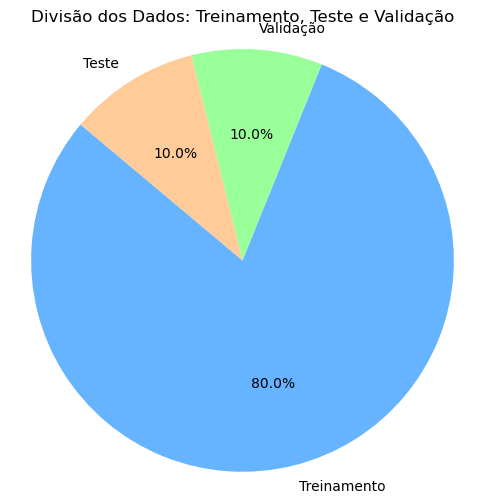

In [38]:
sizes = [len(df_train), len(df_val), len(df_test)]
labels = ['Treinamento', 'Validação', 'Teste']
colors = ['#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(6,6)) # Define o tamanho da figura
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140) # Inicia o gráfico com um ângulo de 140 graus
plt.title('Divisão dos Dados: Treinamento, Teste e Validação')# Título do gráfico
plt.axis('equal')# Garante que o gráfico seja um círculo
plt.show()

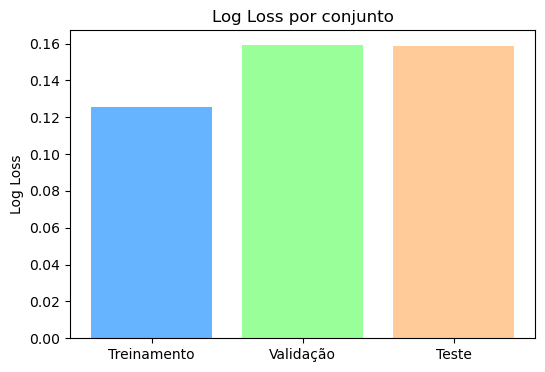

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Separe features e target
X_train, y_train = df_train.drop('species', axis=1), df_train['species'] # Remova a coluna 'species' do DataFrame de treino
X_test, y_test = df_test.drop('species', axis=1), df_test['species'] # Remova a coluna 'species' do DataFrame de teste
X_val, y_val = df_val.drop('species', axis=1), df_val['species'] # Remova a coluna 'species' do DataFrame de validação

# Crie e treine o modelo
model = LogisticRegression(max_iter=200)# Aumente o número máximo de iterações para garantir a convergência
model.fit(X_train, y_train) # Treine o modelo com os dados de treino

# Calcule os losses
loss_train = log_loss(y_train, model.predict_proba(X_train)) # Calcule o log loss para o conjunto de treino
loss_val = log_loss(y_val, model.predict_proba(X_val)) # Calcule o log loss para o conjunto de validação
loss_test = log_loss(y_test, model.predict_proba(X_test)) # Calcule o log loss para o conjunto de teste

# Plote os losses
losses = [loss_train, loss_val, loss_test]
labels = ['Treinamento', 'Validação', 'Teste']

plt.figure(figsize=(6,4))
plt.bar(labels, losses, color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.ylabel('Log Loss')
plt.title('Log Loss por conjunto')
plt.show()

Text(0.5, 1.0, 'Acurácia por conjunto (%)')

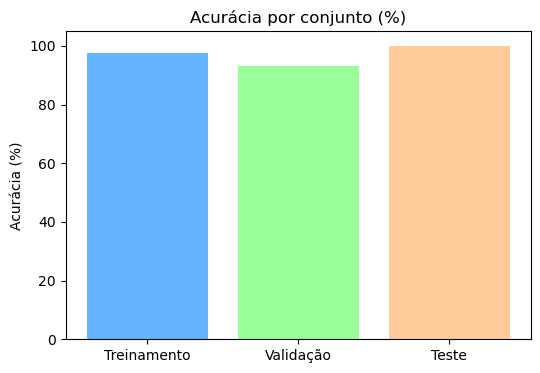

In [40]:
from sklearn.metrics import accuracy_score

# Calcule as acurácias
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, model.predict(X_val))
acc_test = accuracy_score(y_test, model.predict(X_test))

# Plote as acurácias em porcentagem
accuracies = [acc_train * 100, acc_test * 100, acc_val * 100]
labels = ['Treinamento', 'Validação', 'Teste']

plt.figure(figsize=(6,4))
plt.bar(labels, accuracies, color=['#66b3ff', '#99ff99', '#ffcc99'])
plt.ylabel('Acurácia (%)')
plt.title('Acurácia por conjunto (%)')

Text(0.5, 1.0, 'Correlação das Features com o Target')

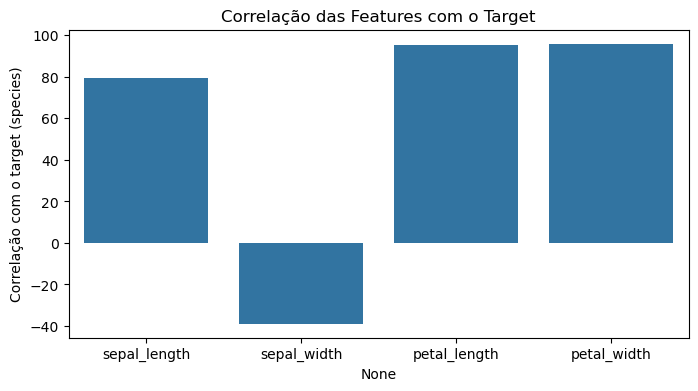

In [57]:
# Plot da correlação entre as features e o target (species)

import seaborn as sns

# Adicione a coluna target de volta ao DataFrame de treino para análise
df_corr = df_train.copy()
df_corr['species'] = y_train

# Calcula a correlação
corr = df_corr.corr()

# Plota a correlação das features com o target
plt.figure(figsize=(8, 4))
sns.barplot(x=corr['species'].drop('species').index, y=corr['species'].drop('species').values *100)# Plota as correlações das features com o target
plt.ylabel('Correlação com o target (species)')
plt.title('Correlação das Features com o Target')

In [58]:
# Prever o target para um novo exemplo usando o modelo treinado
# Supondo que as colunas originais sejam:
colunas = X_train.columns
novo_exemplo_df = pd.DataFrame([[5.9, 3.0, 5.1, 1.8]], columns=colunas)
predito = model.predict(novo_exemplo_df)[0]
print(f"Classe prevista para [5.9, 3.0, 5.1, 1.8]: {categorias_species[predito]}")

Classe prevista para [5.9, 3.0, 5.1, 1.8]: virginica
